**COMPANY BANKRUPTCY PREDICTION**

Context :


The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

**PART 1**

Let's import the libraries and load the dataset. 

In [313]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest


In [314]:
#Loading the data : 

df = pd.read_csv('data_bankruptcy.csv')
df = pd.DataFrame(df)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


**PART 2** 

Let's dive into the data to analyse and clean it.  

In [315]:
print('The shape of the data is :', df.shape)
print('The number of rows in the data is :', df.shape[0])
print('The number of columns in the data is :', df.shape[1])


The shape of the data is : (6819, 96)
The number of rows in the data is : 6819
The number of columns in the data is : 96


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [317]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [318]:
#Let's rename the column 'Bankrupt?' to 'Bankrupt' for simplicity

df.rename(columns={'Bankrupt?':'Bankrupt'}, inplace=True)
df.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


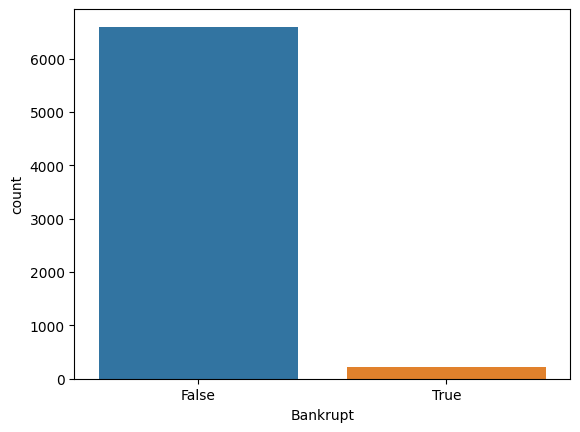

In [319]:
#Let's convert the column 'Bankrupt' to boolean type

df['Bankrupt'] = df['Bankrupt'].astype('bool')
df['Bankrupt'].value_counts()
df.head()

sns.countplot(x='Bankrupt', data=df)
plt.show()


In [320]:
#Check missing values

print("Missing values :")
print(df.isnull().sum().sum())

#Cheking for duplicates

print("Duplicates :")
print(df.duplicated().sum().sum())

Missing values :
0
Duplicates :
0


**PART 3**

Let's divide the dataset in a balanced train and test set, select the best features and run machine learning model.

In [321]:
X = df.drop('Bankrupt', axis=1)
y = df['Bankrupt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)



Shape of X_train :  (5455, 95)
Shape of X_test :  (1364, 95)
Shape of y_train :  (5455,)
Shape of y_test :  (1364,)


Shape of X_train :  (10558, 95)
Shape of y_train :  (10558,)
Shape of X_test :  (1364, 95)
Shape of y_test :  (1364,)


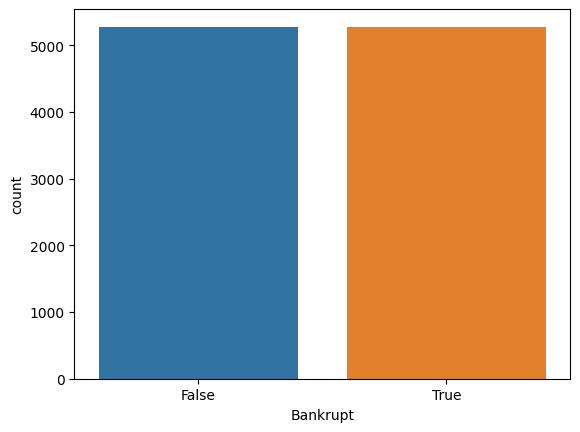

In [322]:
#Let's sample the train set to balance the dataset with equal number of bankrupt and non bankrupt companies

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

#Let's check the distribution of the target variable in the train set

sns.countplot(x=y_train)
plt.show()



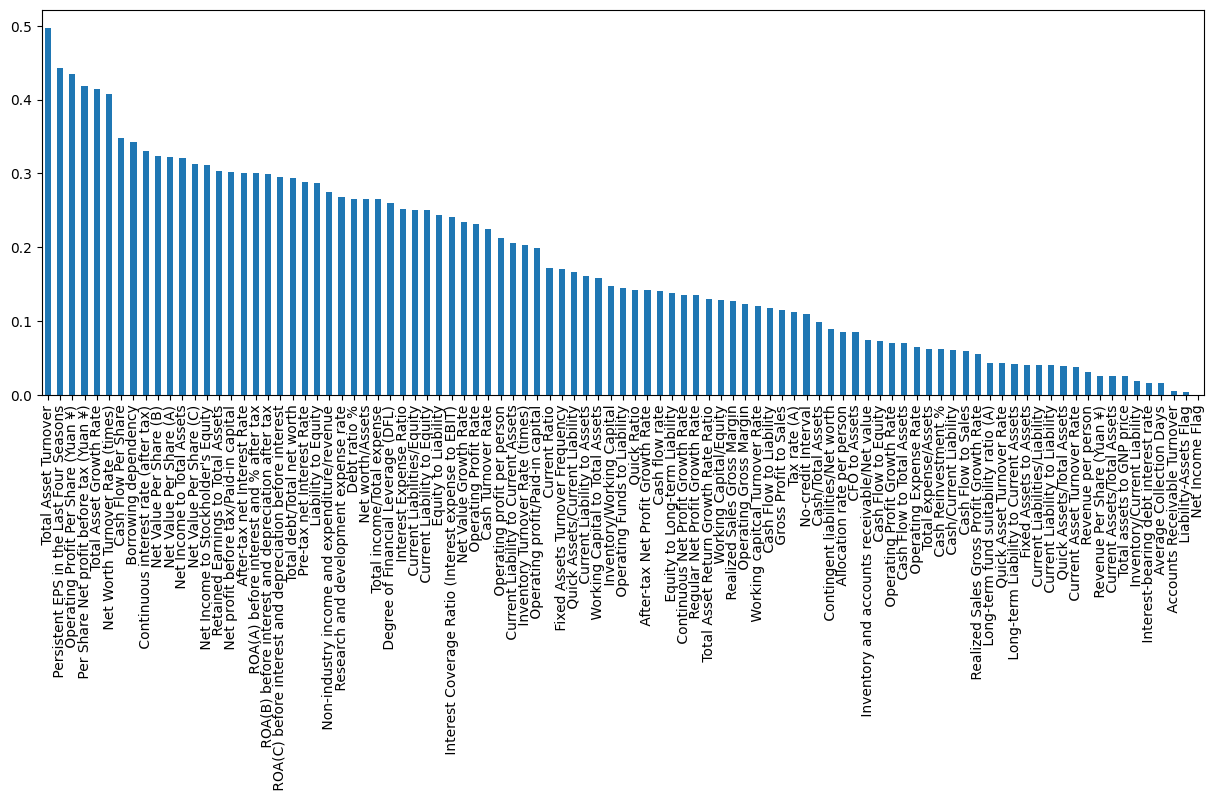

In [323]:
#Let's get the mutual information between the features and the target variable

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)

mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 5))
plt.show()



In [324]:
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)
X_train.columns[sel_.get_support()]

Index([' Continuous interest rate (after tax)', ' Net Value Per Share (B)',
       ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)', ' Total Asset Growth Rate',
       ' Borrowing dependency', ' Total Asset Turnover',
       ' Net Worth Turnover Rate (times)'],
      dtype='object')

In [325]:
#Remove the features with low mutual information

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [326]:
#Logistic Regression

print("Logistic Regression : ")

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Accuracy score : ", accuracy_score(y_test, y_pred_lr))
print("Confusion matrix : ")
print(confusion_matrix(y_test, y_pred_lr))
print("Classification report : ")
print(classification_report(y_test, y_pred_lr))


Logistic Regression : 
Accuracy score :  0.967741935483871
Confusion matrix : 
[[1320    0]
 [  44    0]]
Classification report : 
              precision    recall  f1-score   support

       False       0.97      1.00      0.98      1320
        True       0.00      0.00      0.00        44

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.94      0.97      0.95      1364



/Users/aurel/miniconda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aurel/miniconda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aurel/miniconda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [327]:
#Decision Tree

print("Decision Tree : ")

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Accuracy score : ", accuracy_score(y_test, y_pred_dt))
print("Confusion matrix : ")
print(confusion_matrix(y_test, y_pred_dt))
print("Classification report : ")
print(classification_report(y_test, y_pred_dt))

Decision Tree : 
Accuracy score :  0.905425219941349
Confusion matrix : 
[[1209  111]
 [  18   26]]
Classification report : 
              precision    recall  f1-score   support

       False       0.99      0.92      0.95      1320
        True       0.19      0.59      0.29        44

    accuracy                           0.91      1364
   macro avg       0.59      0.75      0.62      1364
weighted avg       0.96      0.91      0.93      1364



In [328]:
#Support Vector Machine

print("Support Vector Machine : ")

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Accuracy score : ", accuracy_score(y_test, y_pred_svm))
print("Confusion matrix : ")
print(confusion_matrix(y_test, y_pred_svm))
print("Classification report : ")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine : 
Accuracy score :  0.749266862170088
Confusion matrix : 
[[995 325]
 [ 17  27]]
Classification report : 
              precision    recall  f1-score   support

       False       0.98      0.75      0.85      1320
        True       0.08      0.61      0.14        44

    accuracy                           0.75      1364
   macro avg       0.53      0.68      0.49      1364
weighted avg       0.95      0.75      0.83      1364



In [329]:
print("Here is a summary of the models :")

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machine'],
    'Score': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_svm)]})
models.sort_values(by='Score', ascending=False)



Here is a summary of the models :


,Model,Score
0,Logistic Regression,0.967742
1,Decision Tree,0.905425
2,Support Vector Machine,0.749267
